In [1]:
import pandas as pd
import seaborn as sns

### Notes: this data has -1 striping set and no fuse options were used

# load data into dataframe
df = pd.read_csv('../data/fusebenchmarks_hp_cache.csv')

## Reformating data
# create new column where all bandwidth is in MB/s
df['mount'] = df['device']
df.loc[df['unit'] == 'GB/s', 'bandwidth'] *= 1024
df.loc[df['unit'] == 'GB/s', 'unit'] = 'MB/s'
df.loc[df['source'].str.contains('native'), 'device'] = 'native'
df.loc[df['source'].str.contains('sea'), 'device'] = 'sea'

df.loc[df['source'].str.contains('passthrough_fh'), 'device'] = 'passthrough_fh'
df.loc[df['source'].str.contains('passthrough_hp'), 'device'] = 'passthrough_hp'

# fix passthrough mount
df.loc[df['device'].str.contains('passthrough_fh'), 'mount'] = df.loc[df['device'].str.contains('passthrough_fh'), 'mount'].str[18:]

# get actual mount for all devices
df.loc[df['source'].str.contains('/dev/shm'), 'mount'] = 'tmpfs'
df.loc[df['source'].str.contains('/tmp'), 'mount'] = 'ssd'
df.loc[df['source'].str.contains('/mnt/lustre'), 'mount'] = 'Lustre'

d_order = ['native', 'passthrough_fh', 'passthrough_hp', 'sea']
a_order = ['tmpfs', 'SSD', 'Lustre']

df.head(100)

,device,mode,bandwidth,unit,source,mount
0,passthrough_hp,write,1228.8,MB/s,/dev/shm/passthrough_hp,tmpfs
1,passthrough_hp,read,1536.0,MB/s,/dev/shm/passthrough_hp,tmpfs
2,passthrough_hp,cached,6553.6,MB/s,/dev/shm/passthrough_hp,tmpfs
3,passthrough_hp,write,668.0,MB/s,/mnt/lustre/vhs/passthrough_hp,Lustre
4,passthrough_hp,read,161.0,MB/s,/mnt/lustre/vhs/passthrough_hp,Lustre
...,...,...,...,...,...,...
95,passthrough_fh,cached,1331.2,MB/s,/mnt/lustre/vhs/passthrough_fh,Lustre
96,passthrough_hp,write,1228.8,MB/s,/dev/shm/passthrough_hp,tmpfs
97,passthrough_hp,read,2355.2,MB/s,/dev/shm/passthrough_hp,tmpfs
98,passthrough_hp,cached,6553.6,MB/s,/dev/shm/passthrough_hp,tmpfs


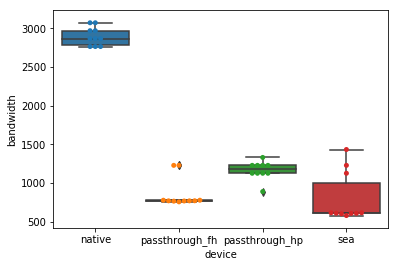

In [2]:
## WRITE BW tmpfs
df_tmpfs = df.loc[df['mount'] == 'tmpfs']
ax = sns.boxplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'write'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'write'], order=d_order)

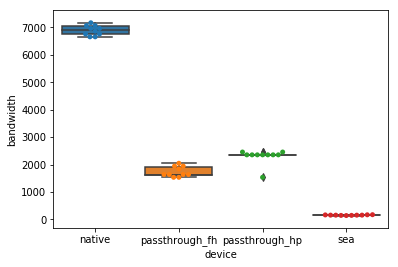

In [3]:
## READ BW TMPFS
ax = sns.boxplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'read'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'read'], order=d_order)

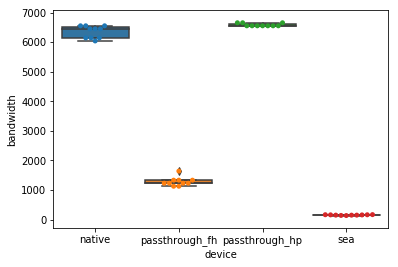

In [4]:
## CACHED READ BW TMPFS
ax = sns.boxplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'cached'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_tmpfs[df_tmpfs['mode'] == 'cached'], order=d_order)

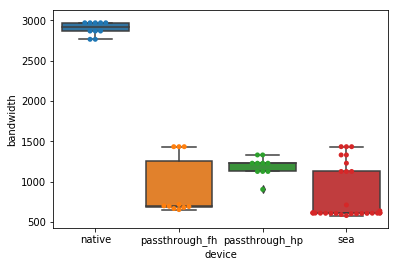

In [5]:
## WRITE BW SSD
df_ssd = df.loc[(df['mount'] == 'ssd') | (df['device'] == 'sea')]
ax = sns.boxplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'write'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'write'], order=d_order)

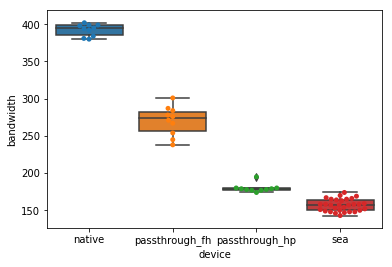

In [6]:
## READ BW SSD
ax = sns.boxplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'read'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'read'], order=d_order)

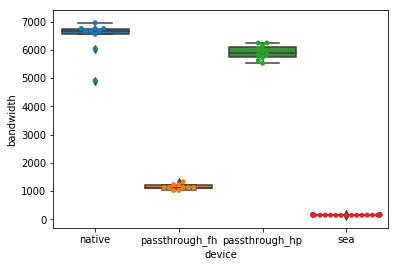

In [7]:
## CACHED READ BW SSD
ax = sns.boxplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'cached'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_ssd[df_ssd['mode'] == 'cached'], order=d_order)

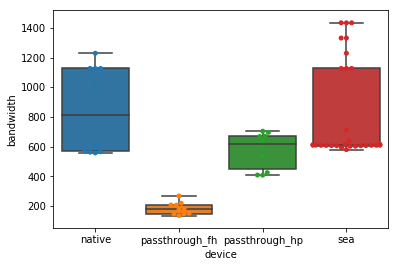

In [8]:
## WRITE BW lustre
df_lustre = df.loc[(df['mount'] == 'Lustre') | (df['device'] == 'sea')]
ax = sns.boxplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'write'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'write'], order=d_order)

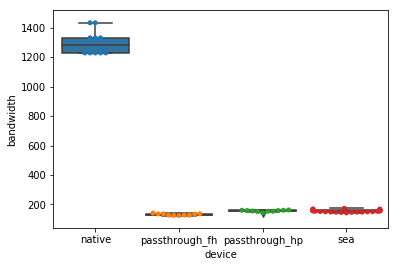

In [9]:
## READ BW lustre
ax = sns.boxplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'read'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'read'], order=d_order)

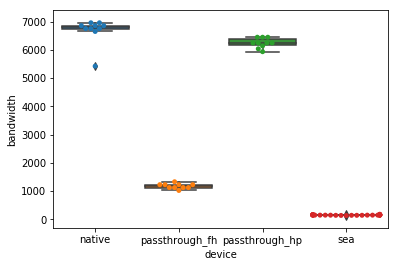

In [10]:
## CACHED READ BW lustre
ax = sns.boxplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'cached'], order=d_order)
ax = sns.swarmplot(x="device", y="bandwidth", data=df_lustre[df_lustre['mode'] == 'cached'], order=d_order)